In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## OMP Particles

In [2]:
omp_particles = pd.read_csv('Results2.0/omp_particles.txt')

In [3]:
omp_particles.tail()

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
25,1,2000,128,227188.085230,200,838.918,4.194590
26,1,2000,64,305190.566085,700,787.176,1.124538
27,1,2000,32,142348.253095,517,150.993,0.292056
28,1,2000,16,69214.420779,207,14.731,0.071166
29,1,2000,8,40710.391489,167,2.961,0.017729


In [4]:
cores = omp_particles[omp_particles[' num_particles']==64]['cores'].unique()

### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


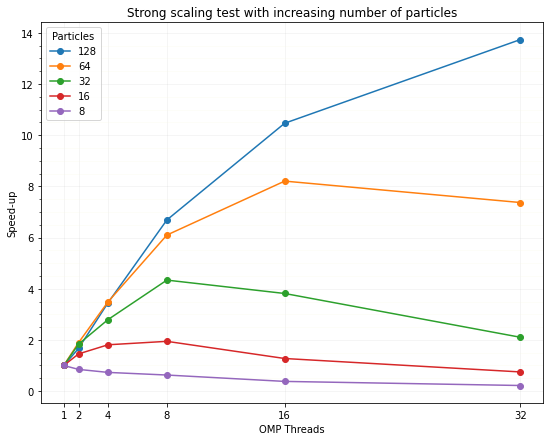

In [9]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
for num_particles in omp_particles[' num_particles'].unique():
    seq_time = omp_particles[(omp_particles[' num_particles']==num_particles)][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores,seq_time/omp_particles[omp_particles[' num_particles']==num_particles][' elapsed/gen_count'], 
             marker='o')
plt.xticks(ticks = cores)
plt.legend([128,64,32,16,8],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Weak Scaling test

Text(0, 0.5, 'Speed-up')

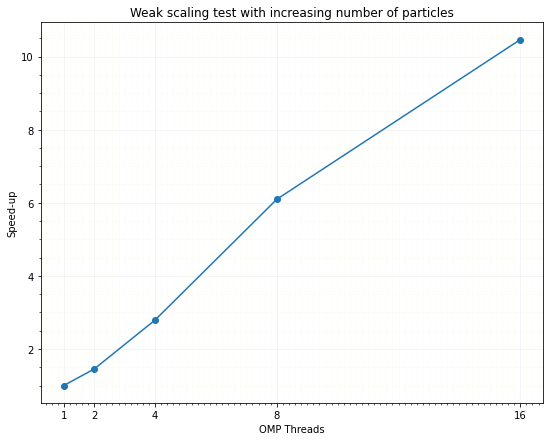

In [25]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
particles = omp_particles[' num_particles'].unique()[::-1]
cores = omp_particles['cores'].unique()[::-1]
for i in range(len(cores)-1):
    x = omp_particles[omp_particles[' num_particles']==particles[i]].loc[omp_particles['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = omp_particles[omp_particles[' num_particles']==particles[i]].loc[omp_particles['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores[:-1],np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores[:-1])
plt.title('Weak scaling test with increasing number of particles')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

## OMP population

In [26]:
omp_pop = pd.read_csv('Results2.0/omp_population.txt')

In [27]:
omp_pop.head(6)

,cores,pop_size,num_particles,final_fitness,gen_count,elapsed,elapsed/gen_count
0,32,64000,20,97660.766334,138,462.833,3.353862
1,32,32000,20,97660.782973,156,350.173,2.244697
2,32,16000,20,97660.782970,238,206.821,0.868994
3,32,8000,20,85399.000567,241,87.630,0.363610
4,32,4000,20,97660.502924,258,50.118,0.194257
5,32,2000,20,97660.055528,473,44.343,0.093748


In [28]:
cores = omp_pop[omp_pop[' pop_size']==64000]['cores'].to_list()

In [29]:
omp_pop[omp_pop[' pop_size']==64000][' elapsed/gen_count'].to_list()[-1]/omp_pop[omp_pop[' pop_size']==64000][' elapsed/gen_count']

0     0.873494
6     1.480109
12    1.872655
18    1.796519
29    1.191888
35    1.000000
Name:  elapsed/gen_count, dtype: float64

### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


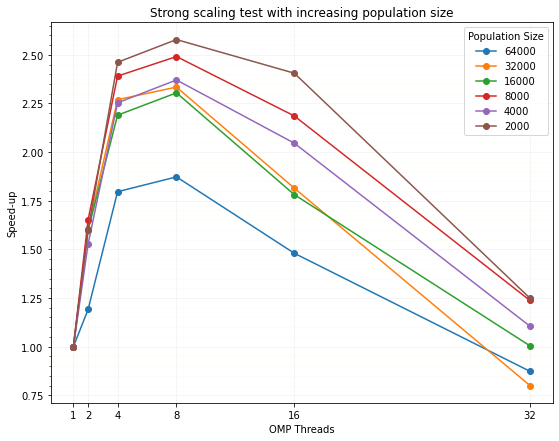

In [30]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
for pop in omp_pop[' pop_size'].unique():
    seq_time = omp_pop[omp_pop[' pop_size']==pop][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores, seq_time/omp_pop[omp_pop[' pop_size']==pop][' elapsed/gen_count'], marker='o')
plt.xticks(ticks = cores)
plt.legend([64000,32000,16000,8000,4000,2000],title="Population Size")
plt.title('Strong scaling test with increasing population size')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

### Weak scaling test

Text(0, 0.5, 'Speed-up')

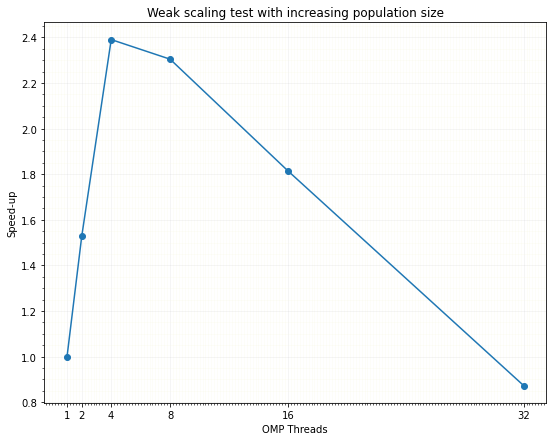

In [31]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
pops = omp_pop[' pop_size'].unique()[::-1]
cores = omp_pop['cores'].unique()
cores = cores[::-1]
for i in range(len(cores)):
    x = omp_pop[omp_pop[' pop_size']==pops[i]].loc[omp_pop['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = omp_pop[omp_pop[' pop_size']==pops[i]].loc[omp_pop['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores,np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores)
plt.title('Weak scaling test with increasing population size')
plt.xlabel('OMP Threads')
plt.ylabel('Speed-up')

## MPI particles

In [41]:
mpi_particles = pd.read_csv('Results2.0/mpi_particles.txt')

In [42]:
mpi_particles.tail()

,cores,pop_size,num_particles,migration_interval,migration_rate,final_fitness,gen_count,elapsed,elapsed/gen_count
25,1,2000,128,50,0.05,214700.832710,200,1822.936,9.114678
26,1,2000,64,50,0.05,227578.157888,200,277.993,1.389964
27,1,2000,32,50,0.05,175157.693659,800,519.459,0.649323
28,1,2000,16,50,0.05,81420.585938,800,126.830,0.158538
29,1,2000,8,50,0.05,32480.000000,800,31.543,0.039429


### Strong scaling test

Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


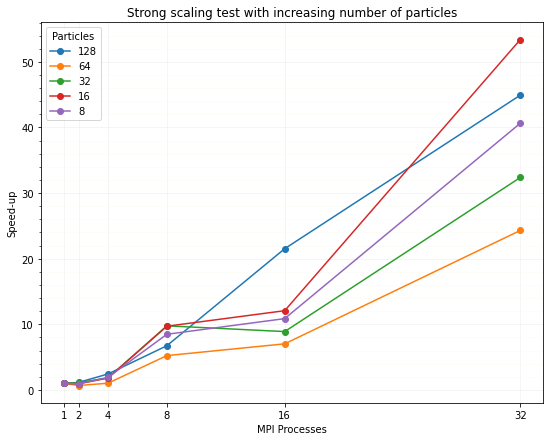

In [58]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
cores = mpi_particles['cores'].unique()
for num_particles in mpi_particles[' num_particles'].unique():
    seq_time = mpi_particles[(mpi_particles[' num_particles']==num_particles)][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores,seq_time/mpi_particles[omp_particles[' num_particles']==num_particles][' elapsed/gen_count'], 
             marker='o')
plt.xticks(ticks = cores)
plt.legend([128,64,32,16,8],title="Particles")
plt.title('Strong scaling test with increasing number of particles')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

### Weak scaling test

Text(0, 0.5, 'Speed-up')

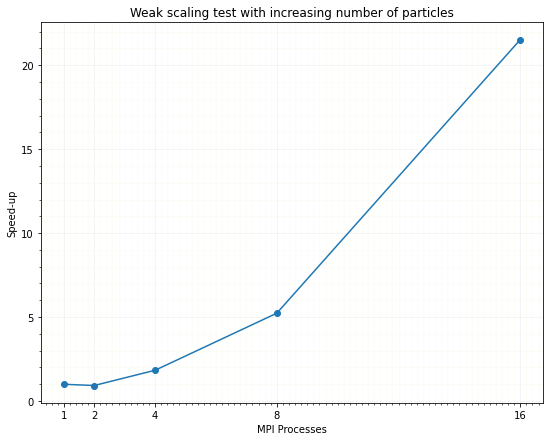

In [60]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
particles = mpi_particles[' num_particles'].unique()[::-1]
cores = mpi_particles['cores'].unique()[::-1]
for i in range(len(cores)-1):
    x = mpi_particles[mpi_particles[' num_particles']==particles[i]].loc[mpi_particles['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = mpi_particles[mpi_particles[' num_particles']==particles[i]].loc[mpi_particles['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores[:-1],np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores[:-1])
plt.title('Weak scaling test with increasing number of particles')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

## MPI population

In [61]:
mpi_pop = pd.read_csv('Results2.0/mpi_population.txt')

In [63]:
mpi_pop.tail()

,cores,pop_size,num_particles,migration_interval,migration_rate,final_fitness,gen_count,elapsed,elapsed/gen_count
31,1,32000,20,50,0.05,97605.112088,800,3419.622,4.274528
32,1,16000,20,50,0.05,97660.782229,800,1152.072,1.440089
33,1,8000,20,50,0.05,97660.782965,800,398.199,0.497748
34,1,4000,20,50,0.05,97660.782978,800,201.068,0.251335
35,1,2000,20,50,0.05,97605.392047,800,100.161,0.125201


Text(0, 0.5, 'Speed-up')

/home/matt/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


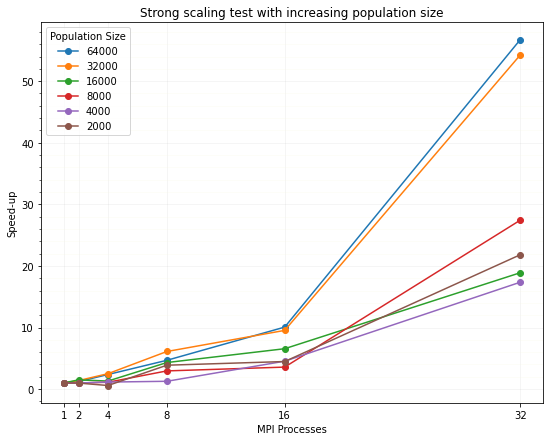

In [68]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
cores = mpi_pop['cores'].unique()
for pop in mpi_pop[' pop_size'].unique():
    seq_time = mpi_pop[mpi_pop[' pop_size']==pop][' elapsed/gen_count'].to_list()[-1]
    plt.plot(cores, seq_time/mpi_pop[mpi_pop[' pop_size']==pop][' elapsed/gen_count'], marker='o')
plt.xticks(ticks = cores)
plt.legend([64000,32000,16000,8000,4000,2000],title="Population Size")
plt.title('Strong scaling test with increasing population size')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

### Weak Scaling

Text(0, 0.5, 'Speed-up')

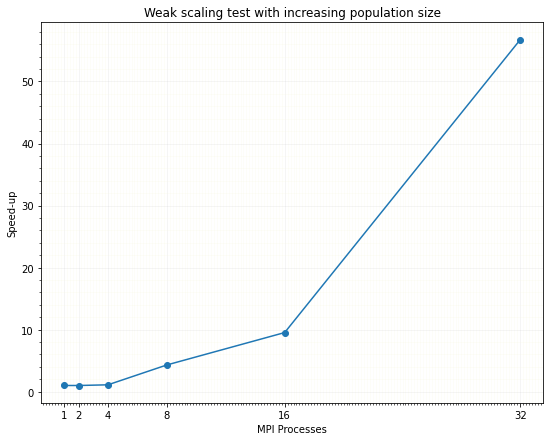

In [69]:
plt.figure(figsize=(9,7))
plt.grid(alpha=0.15)
plt.minorticks_on()
plt.grid(which='minor', color='beige', alpha=0.25)
times = []
seq_times = []
pops = mpi_pop[' pop_size'].unique()[::-1]
cores = mpi_pop['cores'].unique()
cores = cores[::-1]
for i in range(len(cores)):
    x = mpi_pop[mpi_pop[' pop_size']==pops[i]].loc[mpi_pop['cores']==cores[i]][' elapsed/gen_count'].to_list()[0]
    seq_time = mpi_pop[mpi_pop[' pop_size']==pops[i]].loc[mpi_pop['cores']==1][' elapsed/gen_count'].to_list()[0]
    times.append(x)
    seq_times.append(seq_time)
plt.plot(cores,np.array(seq_times)/np.array(times), marker='o')
plt.xticks(ticks = cores)
plt.title('Weak scaling test with increasing population size')
plt.xlabel('MPI Processes')
plt.ylabel('Speed-up')

# Comparing HPC to Laptop

## MPI

### Particles

### Population

## OMP

### Particles

### Population